# Relatório - Análise de reclamações do Procon

## Descrição do problema

Utilizando o framework de análise descrito em aula e as técnicas de visualização apropriadas, será realizada uma análise sobre o *[dataset de reclamações do procon](https://www.kaggle.com/gerosa/procon/data)*. 

**O intuito da análise é descobrir quais são as empresas mais odiadas pelos consumidores.**

Primeiramente, devemos pensar mais sobre a questão em si: **o que leva o consumidor a ter uma opinião negativa acerca de uma empresa?**

Podemos levantar algumas hipóteses:

- Os clientes tem problemas frequentes com aquela empresa
- A empresa não é capaz de resolver o problema do consumidor
- Há uma demora na resolução da reclamação

Diante dessas suposições, estabelecemos algumas métricas para medir o desempenho das empresas:

- Frequência de reclamações
- Porcentagem de reclamações atendidas
- Tempo médio entre a abertura e o arquivamento das reclamações

Além disso, se realizarmos uma avaliação setorial, obteremos mais informações a respeito de quais problemas são mais frequentes para os consumidores.

## Caracterização inicial dos datasets

Com a nossa problemática já bem definida, agora precisamos entender melhor como nossos dados estão estruturados antes de explorá-los.

### Configuração do ambiente

Vamos carregar as bibliotecas necessárias para trabalhar com as nossas bases de dados para, então, ler nossos *datasets*.

In [3]:
# Pré-processamento
import nltk
import string
import re

# Manipulações, cálculos estatísticos e visualização
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nltk.download('rslp')
nltk.download('stopwords')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\Joaquim\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joaquim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data_path = './data/'
plot_path = './plots/'

In [6]:
procon12 = pd.read_csv(data_path + 'reclamacoes-2012.csv')
procon13 = pd.read_csv(data_path + 'reclamacoes-2013.csv')
procon14 = pd.read_csv(data_path + 'reclamacoes-2014.csv')
procon15 = pd.read_csv(data_path + 'reclamacoes-2015.csv')
procon16 = pd.read_csv(data_path + 'reclamacoes-2016.csv')

C:\Users\Joaquim\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Definição de funções auxiliares

Para manter nosso código mais limpo, vamos definir algumas funções.

In [7]:
def table_stemming(word, table):
    if word in table:
        return word
    else:
        return ''
    
#Rescaling
def minmax(df):
    return (df-df.min())/(df.max()-df.min())

#Standardization
def meannorm(df):
    return (df-df.mean())/df.std()


### Identificação dos headers de cada dataset

Vamos olhar o nome e tipo das colunas de cada *dataset*, para ter certeza de que estamos com o arquivo correto e de que o mesmo está seguindo a especificação que está no *Kaggle*.

In [8]:
procon12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211076 entries, 0 to 211075
Data columns (total 23 columns):
AnoCalendario            211076 non-null int64
DataArquivamento         211076 non-null object
DataAbertura             211076 non-null object
CodigoRegiao             211076 non-null int64
Regiao                   211076 non-null object
UF                       211076 non-null object
strRazaoSocial           211076 non-null object
strNomeFantasia          172723 non-null object
Tipo                     211076 non-null int64
NumeroCNPJ               200875 non-null float64
RadicalCNPJ              200324 non-null float64
RazaoSocialRFB           200214 non-null object
NomeFantasiaRFB          90245 non-null object
CNAEPrincipal            200214 non-null float64
DescCNAEPrincipal        196250 non-null object
Atendida                 211076 non-null object
CodigoAssunto            211076 non-null int64
DescricaoAssunto         211076 non-null object
CodigoProblema           21

In [9]:
procon13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268096 entries, 0 to 268095
Data columns (total 23 columns):
AnoCalendario            268096 non-null int64
DataArquivamento         268096 non-null object
DataAbertura             268096 non-null object
CodigoRegiao             268096 non-null int64
Regiao                   268096 non-null object
UF                       268096 non-null object
strRazaoSocial           268096 non-null object
strNomeFantasia          218488 non-null object
Tipo                     268096 non-null int64
NumeroCNPJ               257056 non-null float64
RadicalCNPJ              257056 non-null float64
RazaoSocialRFB           256038 non-null object
NomeFantasiaRFB          119663 non-null object
CNAEPrincipal            251976 non-null float64
DescCNAEPrincipal        251976 non-null object
Atendida                 268096 non-null object
CodigoAssunto            268096 non-null int64
DescricaoAssunto         268096 non-null object
CodigoProblema           2

In [10]:
procon14.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267764 entries, 0 to 267763
Data columns (total 23 columns):
AnoCalendario            267764 non-null int64
DataArquivamento         267764 non-null object
DataAbertura             267764 non-null object
CodigoRegiao             267764 non-null int64
Regiao                   267764 non-null object
UF                       267764 non-null object
strRazaoSocial           267764 non-null object
strNomeFantasia          226691 non-null object
Tipo                     267764 non-null int64
NumeroCNPJ               256993 non-null float64
RadicalCNPJ              256416 non-null float64
RazaoSocialRFB           255312 non-null object
NomeFantasiaRFB          124393 non-null object
CNAEPrincipal            255312 non-null float64
DescCNAEPrincipal        251926 non-null object
Atendida                 267764 non-null object
CodigoAssunto            267764 non-null int64
DescricaoAssunto         267764 non-null object
CodigoProblema           2

In [11]:
procon15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255650 entries, 0 to 255649
Data columns (total 23 columns):
AnoCalendario            255650 non-null int64
DataArquivamento         255650 non-null object
DataAbertura             255650 non-null object
CodigoRegiao             255650 non-null int64
Regiao                   255650 non-null object
UF                       255650 non-null object
strRazaoSocial           255645 non-null object
strNomeFantasia          215012 non-null object
Tipo                     255650 non-null int64
NumeroCNPJ               243302 non-null float64
RadicalCNPJ              243302 non-null float64
RazaoSocialRFB           238591 non-null object
NomeFantasiaRFB          120777 non-null object
CNAEPrincipal            238591 non-null float64
DescCNAEPrincipal        236325 non-null object
Atendida                 255650 non-null object
CodigoAssunto            255650 non-null int64
DescricaoAssunto         255650 non-null object
CodigoProblema           2

In [12]:
procon16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203486 entries, 0 to 203485
Data columns (total 23 columns):
AnoCalendario            203486 non-null int64
DataArquivamento         203486 non-null object
DataAbertura             203486 non-null object
CodigoRegiao             203486 non-null int64
Regiao                   203486 non-null object
UF                       203486 non-null object
strRazaoSocial           203483 non-null object
strNomeFantasia          173722 non-null object
Tipo                     203486 non-null int64
NumeroCNPJ               195292 non-null float64
RadicalCNPJ              195292 non-null float64
RazaoSocialRFB           187287 non-null object
NomeFantasiaRFB          92561 non-null object
CNAEPrincipal            187287 non-null float64
DescCNAEPrincipal        185784 non-null object
Atendida                 203486 non-null object
CodigoAssunto            203486 non-null int64
DescricaoAssunto         203486 non-null object
CodigoProblema           20

Tendo confirmado que os *datasets* estão com os headers padronizados, podemos juntá-los em um único *dataframe*.

In [13]:
dataset = pd.concat([procon12, procon13, procon14, procon15, procon16], ignore_index=True)

### Header Metadata

Vamos também listar a definição de cada coluna para entendermos melhor com quais iremos trabalhar mais tarde.

<div class="alert alert-block alert-info">

- **AnoCalendario** : Ano de referência
- **DataArquivamento** : Data de arquivamento da reclamação
- **DataAbertura** : Data de abertura da reclamação
- **CodigoRegiao** : 1 - Norte, 2 - Nordeste, 3 - Sudeste, 4 - Sul, 5 - Centro-Oeste
- **Regiao** : Nome da região
- **UF** : Estado
- **strRazaoSocial** : Razão social da empresa (Base de dados do Procon)
- **strNomeFantasia** : Nome fantasia da empresa (Base de dados do Procon)
- **Tipo** : 1 - Jurídica, 0 - Física
- **NumeroCNPJ** : CNPJ completo
- **RadicalCNPJ** : Primeiros 8 dígitos do CNPJ
- **RazaoSocialRFB** : Razão social da empresa (Base de dados do Governo)
- **NomeFantasiaRFB** : Nome fantasia da empresa (Base de dados do Governo)
- **CNAEPrincipal** : Código de Atividade Econômica da empresa *([Mais informações](https://cnae.ibge.gov.br/))*
- **DescCNAEPrincipal** : Descrição da Atividade Econômica da Empresa
- **Atendida** : Indica se a reclamação foi atendida
- **CodigoAssunto** : Código do assunto da reclamação
- **DescricaoAssunto** : Descrição do assunto da reclamação
- **CodigoProblema** : Código do problema relatado
- **DescricaoProblema** : Descrição do problema relatado
- **SexoConsumidor** : M - Masculino, F - Feminino
- **FaixaEtariaConsumidor** : Faixa etária do consumidor
- **CEPConsumidor** : Código postal do consumidor

### Pré-processamento

Vamos preparar nossos dados para as análises.

#### Qual a melhor coluna para identificar as empresas?

Temos algumas formas de identificarmos as empresa: seja pelo CNPJ, pela razão social ou pelo nome fantasia, tanto pela base de dados do procon, quanto pela base de dados do governo. Vamos descobrir qual é a melhor.

Queremos a coluna que agrupe as reclamações das empresas o máximo possível. Ou seja, vamos escolher aquela que menos tenha valores nulos e mais tenha as reclamações de um mesmo grupo com um valor único.

In [14]:
total_reclamacoes = dataset.shape[0]

In [15]:
melhor_coluna = dataset.filter(['NumeroCNPJ', 'strRazaoSocial', 'strNomeFantasia', 'RazaoSocialRFB', 'NomeFantasiaRFB'])
num_nulos = total_reclamacoes - melhor_coluna.count()
num_unicos = melhor_coluna.nunique()

In [16]:
1 - ((num_unicos + num_nulos)/total_reclamacoes)

NumeroCNPJ         0.882020
strRazaoSocial     0.899140
strNomeFantasia    0.763573
RazaoSocialRFB     0.885154
NomeFantasiaRFB    0.417665
dtype: float64

De acordo com os resultados, utilizaremos a coluna ```strRazaoSocial``` para identificar as empresas daqui para frente. Podemos, portanto, tornar nosso *dataset* mais leve ao retirar a informação duplicada da nossa base de dados.

In [17]:
lean_dataset = dataset.drop(['NumeroCNPJ', 'RadicalCNPJ', 'RazaoSocialRFB', 'NomeFantasiaRFB'], axis=1)

#### Tratando o nome das empresas

Agora que decidimos qual coluna utilizar, vamos tratar aspectos dos nomes que podem nos atrapalhar na hora de identificar a qual empresa percente uma reclamação, como variações de acentuação, pontuação e *stop-words* comuns da língua portuguesa.

In [18]:
stopwords = nltk.corpus.stopwords.words('portuguese')

regras = [
    ('Ã|Á', 'A'), 
    ('É|Ê', 'E'),  
    ('Í', 'I'), 
    ('Õ|Ô|Ó', 'O'), 
    ('Ú', 'U'),
    ('Ç', 'C'),
    ('\s{1}S\s{0,1}A\s{0,1}$', ''), 
    ('\s{1}S\s{0,1}A\s{1}', ' '), 
    ('\s{1}LTD\s{0,1}$', ''), 
    ('LTD\s{1}', ''), 
    ('\s{1}LTDA\s{0,1}$', ''), 
    ('\s{1}LTDA\s{1}', ' '), 
    ('\s{1}INC\s{0,1}$', ''), 
    ('\s{1}INC\s{1}', ' '), 
    ('\s{1}ME\s{0,1}$', ''), 
    ('\s{1}ME\s{1}', ' '),
    ('\s{2,3}', ' ')
]

In [19]:
empresas = []

#removendo pontuação
lean_dataset['strRazaoSocial'] = lean_dataset['strRazaoSocial'].fillna('').apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

for nome_empresa in lean_dataset['strRazaoSocial'].fillna('').values:    
    nome = nome_empresa
    
    #removendo acentuação e stopwords de empresa
    for pattern, replace in regras:
        regex = re.compile(pattern)
        nome = regex.sub(replace, nome)
    
    #removendo stop-words padrões
    nome_quebrado = [segmento.upper() for segmento in nome.split() if segmento.lower() not in stopwords]
        
    empresas.append(' '.join(nome_quebrado).strip())
    
lean_dataset['strRazaoSocial'] = pd.Series(empresas)

In [20]:
num_nulos = total_reclamacoes - lean_dataset['strRazaoSocial'].count()
num_unicos = lean_dataset['strRazaoSocial'].nunique()
1 - ((num_unicos + num_nulos)/total_reclamacoes)

0.9122639444411279

Pronto, agora temos um desempenho ainda melhor na coluna ```strRazaoSocial```. Poderíamos aplicar mais técnicas, porém correríamos o risco de perder a essência das informações contidas em cada nome, portanto iremos parar por aqui.

#### Transformando as datas

Durante a identificação dos headers, observamos que as colunas ```DataAbertura``` e ```DataArquivamento``` estavam sendo lidas como ```string```. No entanto, para trabalhar com elas é ideal que elas sejam objetos ```datetime```. Faremos, portanto, essa mudança agora.

In [21]:
lean_dataset['DataAbertura'] = pd.to_datetime(lean_dataset['DataAbertura'], format="%Y-%m-%d %H:%M:%S.%f")
lean_dataset['DataArquivamento'] = pd.to_datetime(lean_dataset['DataArquivamento'], format="%Y-%m-%d %H:%M:%S.%f")

## Exploração dos datasets

Finalmente, estamos prontos para analisar os nossos dados. **Relembrando: estamos interessados em descobrir as empresas mais odiadas.**

### Visão macro (setorial)

#### Total de reclamações por ano

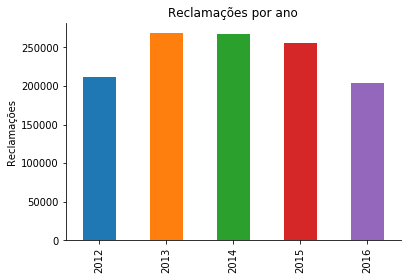

In [22]:
reclamacoes_ano = lean_dataset['AnoCalendario'].value_counts().sort_index()
ax = reclamacoes_ano.plot(
    kind='bar'
)

ax.set_title('Reclamações por ano')
ax.set_ylabel('Reclamações');
sns.despine()

#### Total de reclamações por setor

In [48]:
setores = lean_dataset.groupby(['DescCNAEPrincipal', 'AnoCalendario']).size().to_frame('freq').reset_index()

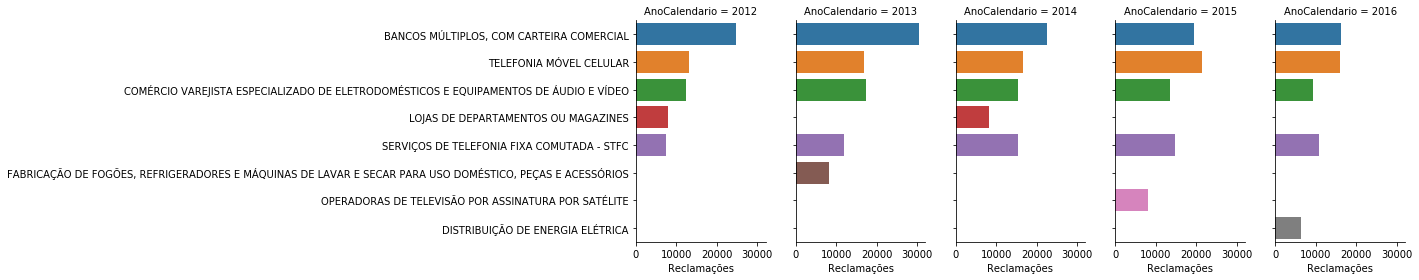

In [49]:
facet = sns.factorplot(
    kind='bar',
    orient='h',
    data=setores.groupby('AnoCalendario').apply(pd.DataFrame.nlargest, columns=['freq'], n = 5),
    x='freq',
    y='DescCNAEPrincipal',
    col='AnoCalendario'
)

facet.fig.tight_layout(w_pad=2)
facet.set_ylabels('')
facet.set_xlabels('Reclamações')
facet.savefig(plot_path + 'setores.png')

In [24]:
rank_setores = setores.stack().unstack(level=0).sum().sort_values(ascending=False)[:10]
ax = rank_setores.sort_values().plot(
    kind='barh',
    figsize=(7,10)
)

ax.set_title('Setores com maior número de reclamações')
ax.set_ylabel('')
ax.set_xlabel('Reclamações');
sns.despine()

TypeError: Empty 'DataFrame': no numeric data to plot

#### Total de reclamações por ano em cada setor

In [ ]:
rank_setores_anual = setores.align(rank_setores, join='right', axis=0)[0]

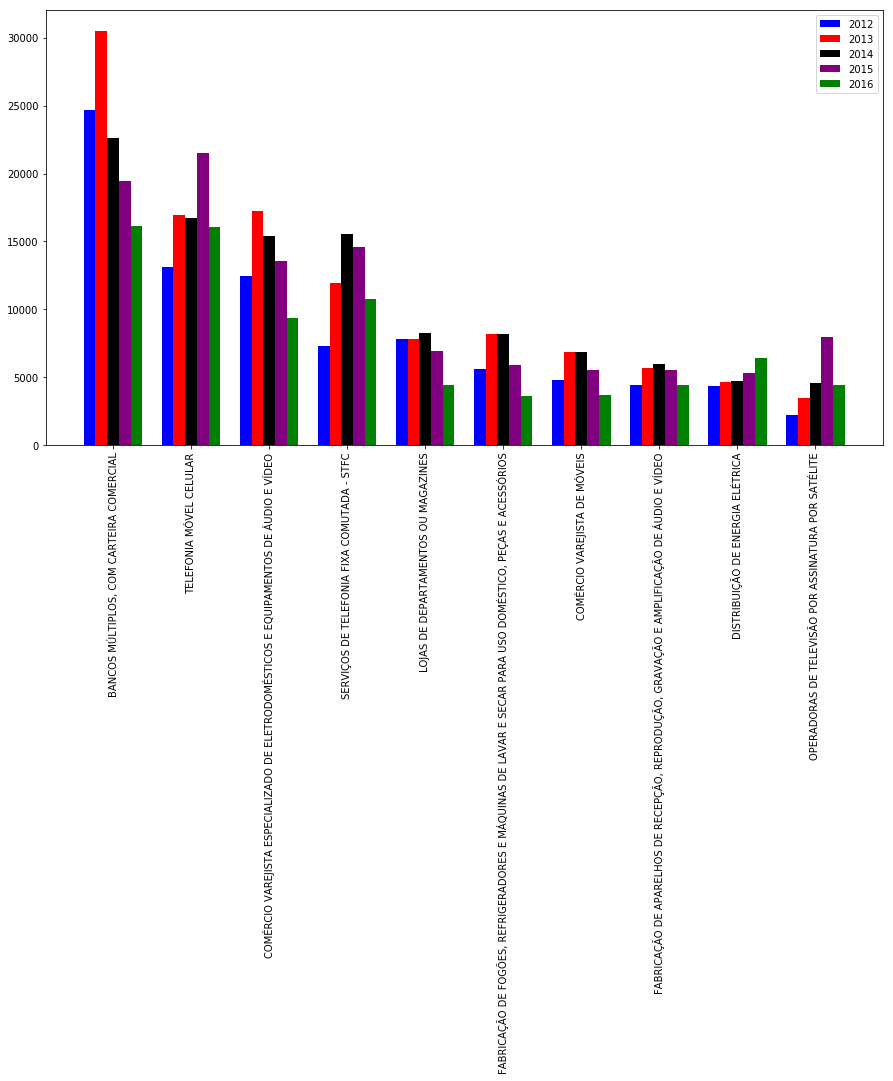

In [120]:
width = 0.3
ind = np.arange(len(rank_setores_anual[2012]))

fig, ax = plt.subplots(figsize=(15,8))

rects2012 = ax.bar(ind - width, rank_setores_anual[2012], width/2,
                color='Blue', label='2012')
rects2012 = ax.bar(ind - width/2, rank_setores_anual[2013], width/2,
                color='Red', label='2013')
rects2014 = ax.bar(ind, rank_setores_anual[2014], width/2,
                color='Black', label='2014')
rects2015 = ax.bar(ind + width/2, rank_setores_anual[2015], width/2,
                color='Purple', label='2015')
rects2016 = ax.bar(ind + width, rank_setores_anual[2016], width/2,
                color='Green', label='2016')

plt.xticks(rotation=90)
ax.set_xticks(ind)
ax.set_xticklabels(rank_setores_anual[2012].keys())
ax.legend();

#### Total de reclamações por empresa

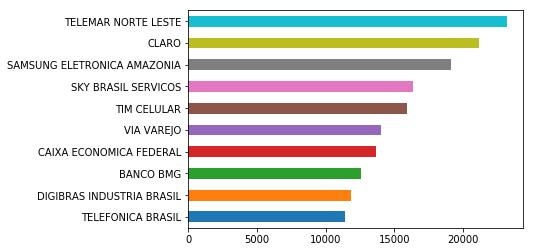

In [113]:
rank_empresas = lean_dataset['strRazaoSocial'].value_counts().sort_values(ascending=False)
rank_empresas[:10].sort_values().plot(
    kind='barh'
);

### Visão micro (empresarial)

#### Frequência de reclamações

De acordo com as métricas estabelecidas durante a descrição do problema, tentaremos encontrar algo que nos ajude na frequência de reclamações das empresas.

In [115]:
rank_reclamacoes = lean_dataset['strRazaoSocial'].value_counts()
rank_reclamacoes.describe()

count    105816.000000
mean         11.397823
std         211.969401
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max       23176.000000
Name: strRazaoSocial, dtype: float64

In [118]:
norm_rank = minmax(rank_reclamacoes)

In [ ]:
plt.scatter(norm_rank, rank_reclamacoes)
plot_routine(title='Distribuição de reclamações por empresa', ylabel='Reclamações', file='dist-reclamacoes.png')